In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("loans.csv")

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
threshold = 0.1

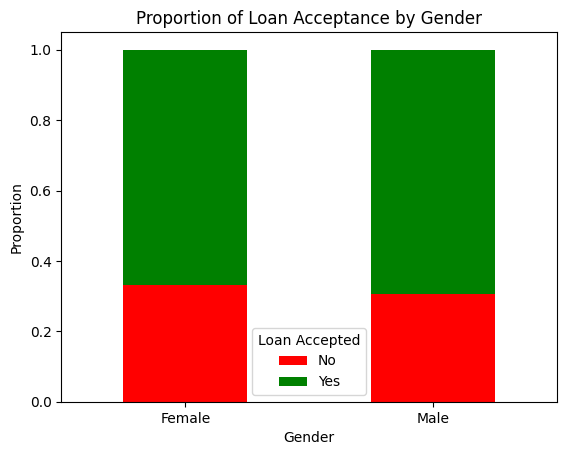

In [9]:
gender_counts = data.groupby(['Gender', 'Loan_Status']).size().unstack(fill_value=0)
gender_proportions = gender_counts.div(gender_counts.sum(axis=1), axis=0)
gender_proportions.plot(kind='bar', stacked=True, color=['r', 'g'])
plt.title('Proportion of Loan Acceptance by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Loan Accepted', labels=['No', 'Yes'])
plt.show()

In [10]:
m_prop = gender_proportions['Y']['Male']
f_prop = gender_proportions['Y']['Female']
if (max(f_prop, m_prop) - min(f_prop, m_prop)) > threshold:
    print("Your model has bias in gender.")
else:
    print("Your model does not have bias in gender.")

Your model does not have bias in gender.


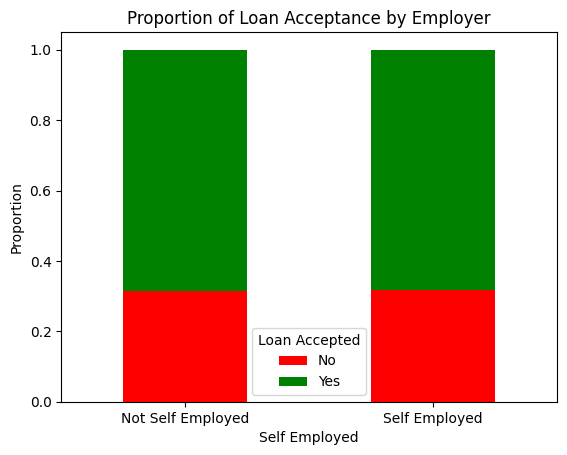

In [29]:
se_counts = data.groupby(['Self_Employed', 'Loan_Status']).size().unstack(fill_value=0)
se_proportions = se_counts.div(se_counts.sum(axis=1), axis=0)
se_plot = se_proportions.plot(kind='bar', stacked=True, color=['r', 'g'])
plt.title('Proportion of Loan Acceptance by Employer')
plt.xlabel('Self Employed')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
se_plot.set_xticklabels(["Not Self Employed", "Self Employed"])
plt.legend(title='Loan Accepted', labels=['No', 'Yes'])
plt.show()

In [39]:
se_prop = se_proportions['Y']['Yes']
nse_prop = se_proportions['Y']['No']
if (max(se_prop, nse_prop) - min(se_prop, nse_prop)) > threshold:
    print("Your model has bias by employer.")
else:
    print("Your model does not have bias by employer.")

Your model does not have bias by employer.


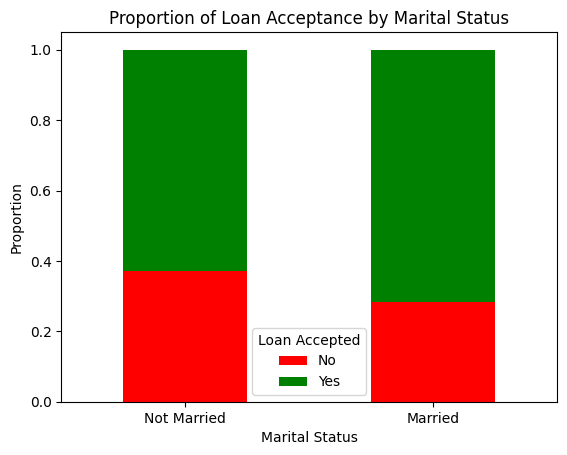

In [38]:
married_counts = data.groupby(['Married', 'Loan_Status']).size().unstack(fill_value=0)
married_proportions = married_counts.div(married_counts.sum(axis=1), axis=0)
marriage_plot = married_proportions.plot(kind='bar', stacked=True, color=['r', 'g'])
plt.title('Proportion of Loan Acceptance by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
marriage_plot.set_xticklabels(["Not Married", "Married"])
plt.legend(title='Loan Accepted', labels=['No', 'Yes'])
plt.show()

In [14]:
married_prop = married_proportions['Y']['Yes']
not_married_prop = married_proportions['Y']['No']
if (max(married_prop, not_married_prop) - min(married_prop, not_married_prop)) > threshold:
    print("Your model has bias in marital status.")
else:
    print("Your model does not have bias in marital status.")

Your model does not have bias in marital status.
